Imports for data retrieving and player data

In [1]:
from data_retriever import match_reports, players_with_team_position, score_and_fixtures, file_create
from player_data import PlayerData

Data generation

In [2]:
# for season in range(17, 22):
    # player_info = players_with_team_position(season)
    # file_create(
    #     file_details=player_info, 
    #     file_name=f"20{season}-20{season + 1} player_info.json", 
    #     file_path=f"data/Premier League/player information"
    #     )
    
# score_and_fixtures(21)
# match_reports(21)


In [3]:
all_data = {}

all_data["17/18"] = PlayerData(17)
all_data["18/19"] = PlayerData(18)
all_data["19/20"] = PlayerData(19)

categories = all_data["17/18"].headers['header']
others = ['transfers_balance', 'creativity', 'transfers_in', 'sub_ins', 'ict_index', 'sub_outs', 'played_60', 'bonus', 
'appearances', 'total_points', 'transfers_out', 'bps', 'starts', 'threat', 'influence', 'value', 'value_change']

seasons = ['17/18', '18/19', '19/20']

teams = {key: sorted(value.players.keys()) for key, value in all_data.items()}
for season in teams.keys():
  teams[season].append('all_teams')


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from pprint import pprint
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
plt.rcParams['figure.figsize'] = [15, 20]

In [5]:
def column_creator(df: pd.DataFrame, expression: str):
  column_name, formula = expression.split(" = ")
  formula = formula.split(' ')
  df[column_name] = df[formula[0]]
  is_operation = True
  operation = ''

  for string in formula[1:]:
    if is_operation:
      operation = string

    else:
      if operation == '+':
        df[column_name] += df[string]

      elif operation == '-':
        df[column_name] -= df[string]

      elif operation == '/':
        df[column_name] /= df[string]

      elif operation == '*':
        df[column_name] *= df[string]

    is_operation = not is_operation
    
  df[column_name].replace([np.nan, np.inf], 0, inplace=True)



In [6]:
extras = ['minutes_per_goal = minutes / goals',
          'minutes_per_assist = minutes / assists',
          'goals_xg_diff = goals - xg',
          'assists_xa_diff = assists - xa',
          'minutes_per_sca = minutes / sca',
          'minutes_per_gca = minutes / gca',
          'goals_to_shot_ratio = goals / shots_total',
          'target_to_shot_ratio = shots_on_target / shots_total',
          'dribbles_per_app = dribbles / appearances',
          'blocks_per_app = blocks / appearances',
          'clearances_per_app = clearances / appearances',
          'errors_per_app = errors / appearances',
          'points_per_app = total_points / appearances',
          'tackles_pct = tackles_won / tackles',
          'interceptions_per_app = interceptions / appearances',
          'touches_per_app = touches / appearances',
          'minutes_per_cross = minutes / crosses',
          'minutes_per_fouled = minutes / fouled',
          'minutes_per_foul = minutes / fouls',
          'minutes_per_offside = minutes / offsides',
          'ball_recoveries_per_app = ball_recoveries / appearances',
          'through_pass_ratio = through_balls / passes',
          'dist_per_carry = carry_distance / carries',
          'prog_dist_per_carry = carry_progressive_distance / progressive_carries',
          'prog_to_total_ratio = passes_progressive_distance / passes_total_distance',
          'sub_outs_per_start = sub_outs / starts',
          'sub_ins_per_app = sub_ins / appearances',
          'minutes_per_yellow = cards_yellow / minutes',
          'fouls_per_yellow = fouls / cards_yellow',
          'miscontrols_per_app = miscontrols / appearances',
          'dispossessed_per_app = dispossessed / appearances',
          'played_60_per_app = played_60 / appearances',
          'oob_per_pass = passes_oob / passes',
          'intercepted_per_pass = passes_intercepted / passes',
          'blocked_per_pass = passes_blocked / passes',
          'prog_per_pass_recieved = progressive_passes_received / passes_received',
          'bonus_per_app = bonus / appearances',
          'transfers_ratio = transfers_in / transfers_out',

          'carries_into_final_third_pct = carries_into_final_third / carries',
          'carries_into_pen_area_pct = carries_into_penalty_area / carries',

          'passes_pct_short = passes_completed_short / passes_short',
          'passes_pct_long = passes_completed_long / passes_long',
          'passes_pct_medium = passes_completed_medium / passes_medium',

          'touches_att_pen_area_pct = touches_att_pen_area / touches',
          'touches_att_3rd_pct = touches_att_3rd / touches',
          'touches_mid_3rd_pct = touches_mid_3rd / touches',
          'touches_def_3rd_pct = touches_def_3rd / touches',
          'touches_def_pen_area_pct = touches_def_pen_area / touches'
]

In [7]:
batch = 'entire_season'

data = {key: value.data_lister() for key, value in all_data.items()}

In [8]:
threshold = 380

In [9]:
observations = {}

for season in teams.keys():
  observations[season] = {}
  for team in teams[season][:-1]:
    df = data[season][team]['player_stats']
    obsrvtns = len(df[df['minutes'] > threshold])
    observations[season][team] = obsrvtns

for season in teams.keys():
  datapoints = list(observations[season].values())
  print(f"{season}: {sum(datapoints) / len(datapoints)}")


17/18: 20.0
18/19: 20.15
19/20: 20.35


In [10]:
for season in seasons:
  for team in teams[season][:-1]:
    positions = data[season][team]['player_stats']['position']
    places = []
    for p in positions:
      keys = list(p.keys())
      values = list(p.values())
      if len(values) > 0:
        mx = max(values)
        ind = values.index(mx)

        top_pstn = keys[ind]
        if top_pstn[-1] == 'K':
          places.append('Gkp')
        elif top_pstn[-1] == 'B':
          places.append('Def')
        elif top_pstn[-1] == 'M':
            places.append('Mid')
        else:
            places.append('Fwd')
      else:
        places.append("Nil")

    data[season][team]['player_stats']['places'] = places
    ages = data[season][team]['player_stats']['age']
    ages = [int(age.split('-')[0]) if age != 0 else 0 for age in ages]
    data[season][team]['player_stats']['age'] = ages


In [11]:
columns = {
  "player_info":
  ['player',
  'position',
  'age'],

  "appearances":
  ['minutes',
  'appearances',
  'starts',
  'played_60',
  'own_goals'],

  "passing":
  ['passes_pct',
  'passes_pct_short',
  'passes_pct_medium',
  'passes_pct_long',
  'passes_received_pct'],

  "fpl":
  ['influence',
  'creativity',
  'threat',
  'ict_index',
  'total_points',
  'value',
  'value_change'],

  "expected":
  ['xg',
  'npxg',
  'xa'],
   
   "attack_ratios":
  ['minutes_per_goal',
  'minutes_per_assist',
  'goals_xg_diff',
  'assists_xa_diff',
  'minutes_per_sca',
  'minutes_per_gca',
  'goals_to_shot_ratio',
  'target_to_shot_ratio'],

  "fpl_ratios":
  ['points_per_app',
  'transfers_ratio',
  'bonus_per_app'],

  "defense":
  ['tackles_pct',
  'interceptions_per_app',
  'blocks_per_app',
  'clearances_per_app',
  'ball_recoveries_per_app',
  'dribble_tackles_pct',
  'pressure_regain_pct'],

  "error_ratios":
  ['errors_per_app',
  'dispossessed_per_app',
  'miscontrols_per_app',
  'oob_per_pass',
  'intercepted_per_pass',
  'blocked_per_pass',
  'minutes_per_yellow',
  'fouls_per_yellow'],
  
  "foul_ratios":
  ['minutes_per_fouled',
  'minutes_per_foul'],

  "possession_ratios":
  ['minutes_per_offside',
  'through_pass_ratio',
  'dist_per_carry',
  'prog_dist_per_carry',
  'prog_per_pass_recieved',
  'dribbles_per_app',
  'touches_per_app',
  'minutes_per_cross',
  'dribbles_completed_pct',
  'aerials_won_pct',
  'carries_into_pen_area_pct',
  'carries_into_final_third'
  ],

  "start_ratios":
  ['sub_outs_per_start',
  'sub_ins_per_app',
  'played_60_per_app'],

  "touches":
  ['touches_att_pen_area_pct',
  'touches_att_3rd_pct',
  'touches_mid_3rd_pct',
  'touches_def_3rd_pct',
  'touches_def_pen_area_pct']
}

In [12]:
extra_column_names = [exprssn.split(' = ')[0] for exprssn in extras]

for exprssn in extras:
  for season in seasons:
    for team in teams[season][:-1]:
      column_creator(df=data[season][team]['player_stats'], expression=exprssn)

In [13]:
for season in seasons:
  dfs = []
  for team in teams[season][:-1]:
    dfs.append(data[season][team]['player_stats'])

  data[season]["all_teams"] = {"player_stats": None}
  data[season]["all_teams"]['player_stats'] = pd.concat(dfs)
  data[season]["all_teams"]['player_stats'].reset_index(inplace=True)

In [14]:
cols = []

for key, value in columns.items():
  if key != "player_info":
    cols += value

In [21]:
data['17/18']['teams_stats'].columns

Index(['team_name', 'matches_played', 'pts', 'home_pts', 'away_pts', 'xG',
       'wins', 'draws', 'losses', 'home_wins', 'away_wins', 'home_draws',
       'away_draws', 'home_losses', 'away_losses', 'form', 'home_form',
       'away_form', 'cleansheets', 'home_cleansheets', 'away_cleansheets',
       'number_of_players', 'active_players', 'goals_for', 'goals_against',
       'home_goals_for', 'home_goals_against', 'away_goals_for',
       'away_goals_against', 'pct_possession', 'manager(s)', 'formation(s)',
       'cards_yellow', 'cards_red', 'cards_yellow_red'],
      dtype='object')

In [29]:
extra_team_columns = [
    'pts_per_game = pts / matches_played',
    'home_pts_ratio = home_pts / pts',
    'away_pts_ratio = away_pts / pts',
    'wins_ratio = wins / matches_played',
    'draws_ratio = draws / matches_played',
    'h_cleansheets_ratio = home_cleansheets / cleansheets',
    'a_cleansheets_ratio = away_cleansheets / cleansheets',
    'pct_possession = pct_possession / matches_played',
    'goal_ratio = goals_for / goals_against',
    'home_goal_ratio = home_goals_for / home_goals_against',
    'away_goal_ratio = away_goals_for / away_goals_against',
    'home_win_ratio = home_wins / wins',
    'away_win_ratio = away_wins / wins',
    'home_draw_ratio = home_draws / draws',
    'away_draw_ratio = away_draws / draws',
    'home_loss_ratio = home_losses / losses',
    'away_loss_ratio = away_losses / losses'
]

In [30]:
extra_team_column_names = [exprssn.split(' = ')[0] for exprssn in extra_team_columns]
for exprssn in extra_team_columns:
  for season in seasons:
    column_creator(df=data[season]['teams_stats'], expression=exprssn)

In [31]:
data['17/18']['teams_stats']

,team_name,matches_played,pts,home_pts,away_pts,xG,wins,draws,losses,home_wins,...,a_cleansheets_ratio,goal_ratio,home_goal_ratio,away_goal_ratio,home_win_ratio,away_win_ratio,home_draw_ratio,away_draw_ratio,home_loss_ratio,away_loss_ratio
0,Arsenal,38,63,47,16,68.2,19,6,13,15,...,0.384615,1.450980,2.700000,0.645161,0.789474,0.210526,0.333333,0.666667,0.153846,0.846154
1,Bournemouth,38,44,26,18,45.0,11,11,16,7,...,1.166667,0.737705,0.866667,0.612903,0.636364,0.363636,0.454545,0.545455,0.437500,0.562500
2,Brighton,38,40,29,11,37.1,9,13,16,7,...,1.200000,0.629630,0.960000,0.344828,0.777778,0.222222,0.615385,0.384615,0.250000,0.750000
3,Burnley,38,54,26,28,34.8,14,12,12,7,...,0.583333,0.923077,0.941176,0.909091,0.500000,0.500000,0.416667,0.583333,0.583333,0.416667
4,Chelsea,38,70,37,33,57.7,21,7,10,11,...,0.250000,1.631579,1.875000,1.454545,0.523810,0.476190,0.571429,0.428571,0.400000,0.600000
5,Crystal Palace,38,44,26,18,55.9,11,11,16,7,...,1.000000,0.818182,1.074074,0.571429,0.636364,0.363636,0.454545,0.545455,0.437500,0.562500
6,Everton,38,49,34,15,41.6,13,10,15,10,...,0.600000,0.758621,1.272727,0.444444,0.769231,0.230769,0.400000,0.600000,0.333333,0.666667
7,Huddersfield,38,37,23,14,31.7,9,10,19,6,...,1.300000,0.482759,0.640000,0.363636,0.666667,0.333333,0.500000,0.500000,0.421053,0.578947
8,Leicester City,38,47,27,20,48.1,12,11,15,7,...,0.444444,0.933333,1.136364,0.815789,0.583333,0.416667,0.545455,0.454545,0.400000,0.600000
9,Liverpool,38,75,43,32,72.8,21,12,5,12,...,0.235294,2.210526,4.500000,1.392857,0.571429,0.428571,0.583333,0.416667,0.000000,1.000000


In [22]:
for season in seasons:
  df = data[season]['all_teams']['player_stats']
  
  correlation = df[cols].corr()
  correlation.to_csv(f"eda/{batch}/{batch}_{season.split('/')[0]}_correlation.csv")

  covariance = df[cols].cov()
  covariance.to_csv(f"eda/{batch}/{batch}_{season.split('/')[0]}_covariance.csv")
  
  description = df[cols].describe()
  description.to_csv(f"eda/{batch}/{batch}_{season.split('/')[0]}_description.csv")



In [10]:
desc = {}
for season in seasons:
    df = pd.read_csv(f"eda\entire_season\entire_season_{season.split('/')[0]}_description.csv", index_col=0)
    desc[season] = df

corr = {}
for season in seasons:    
    df = pd.read_csv(f"eda\entire_season\entire_season_{season.split('/')[0]}_correlation.csv", index_col=0)
    corr[season] = df

covr = {}
for season in seasons:    
    df = pd.read_csv(f"eda\entire_season\entire_season_{season.split('/')[0]}_covariance.csv", index_col=0)
    covr[season] = df

<AxesSubplot:>

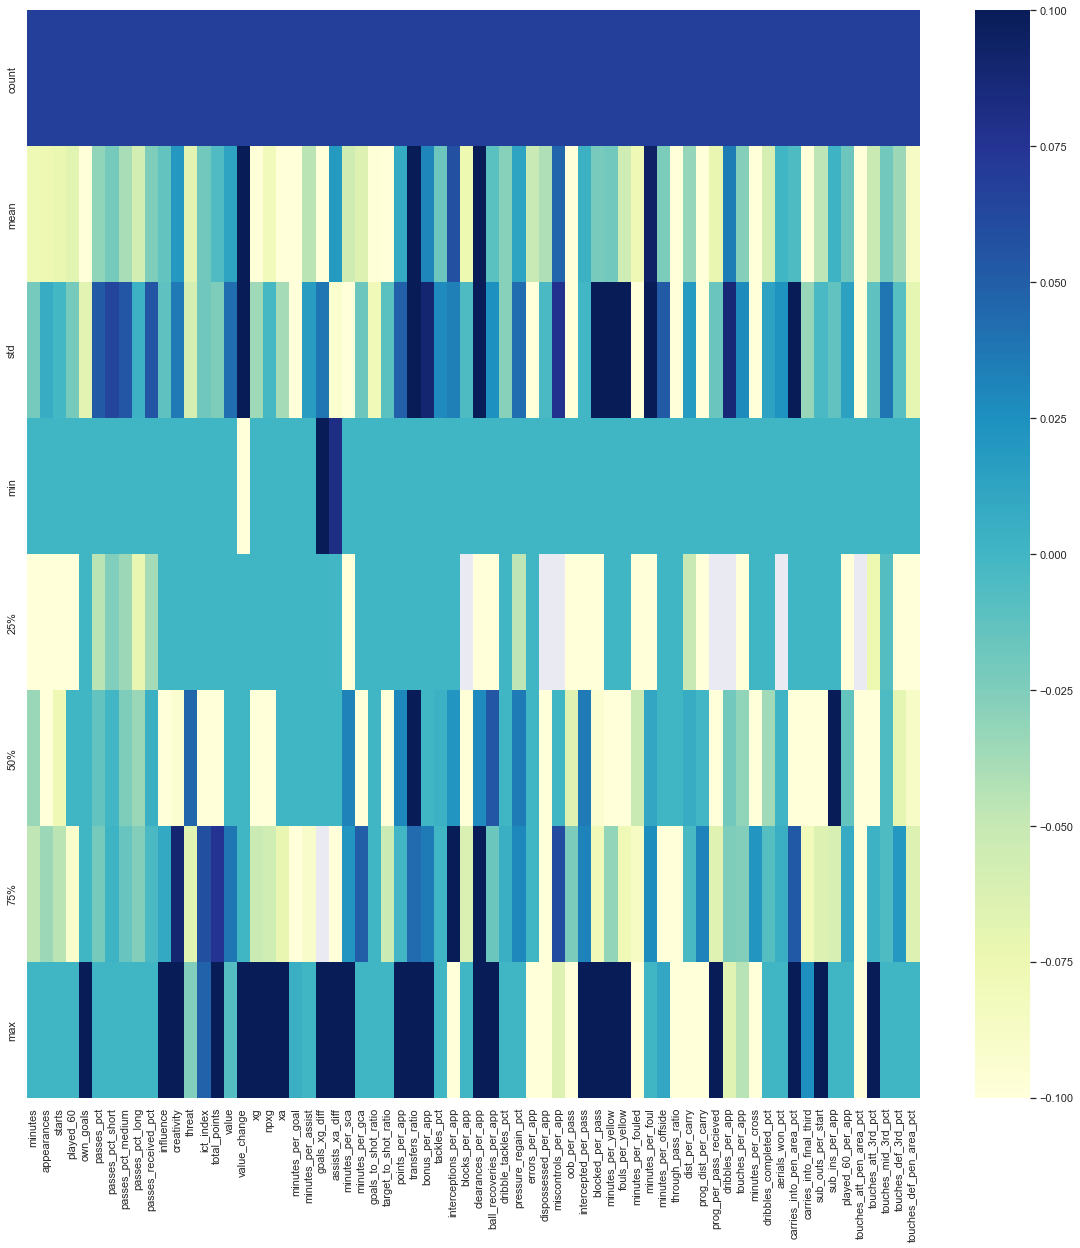

In [31]:
desc_17_compare = (desc['17/18'] - desc['18/19']) / desc['17/18']
desc_17_compare.fillna(0, inplace=True)
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(desc_17_compare, cmap="YlGnBu")

<AxesSubplot:>

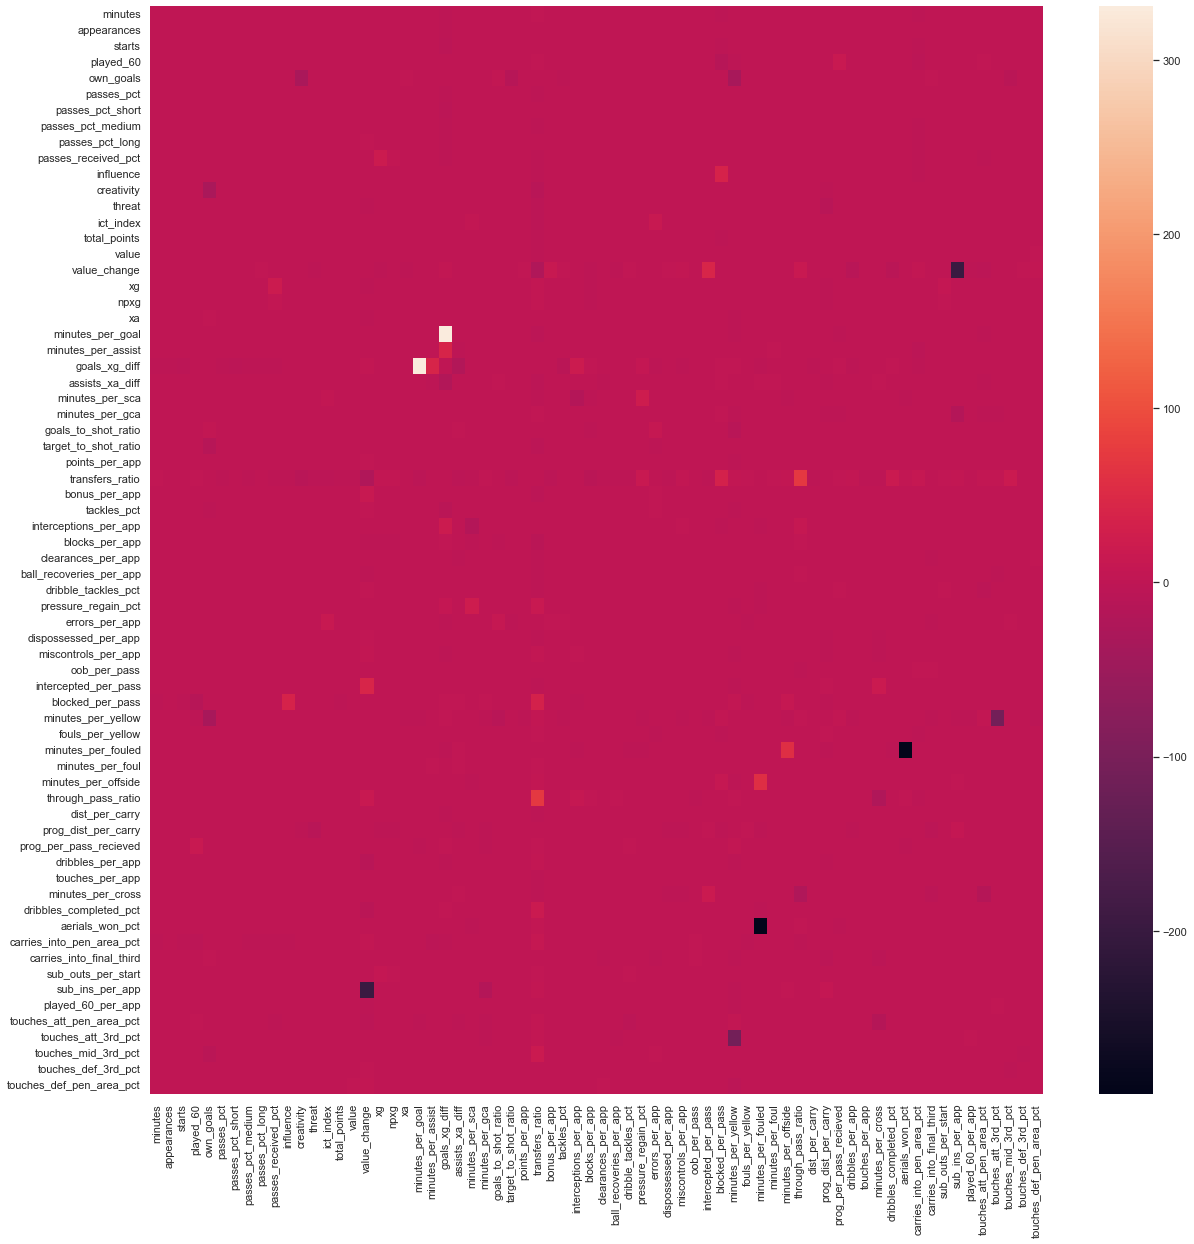

In [27]:
corr_17_compare = (corr['17/18'] - corr['18/19']) / corr['17/18']
sns.heatmap(corr_17_compare)

<AxesSubplot:>

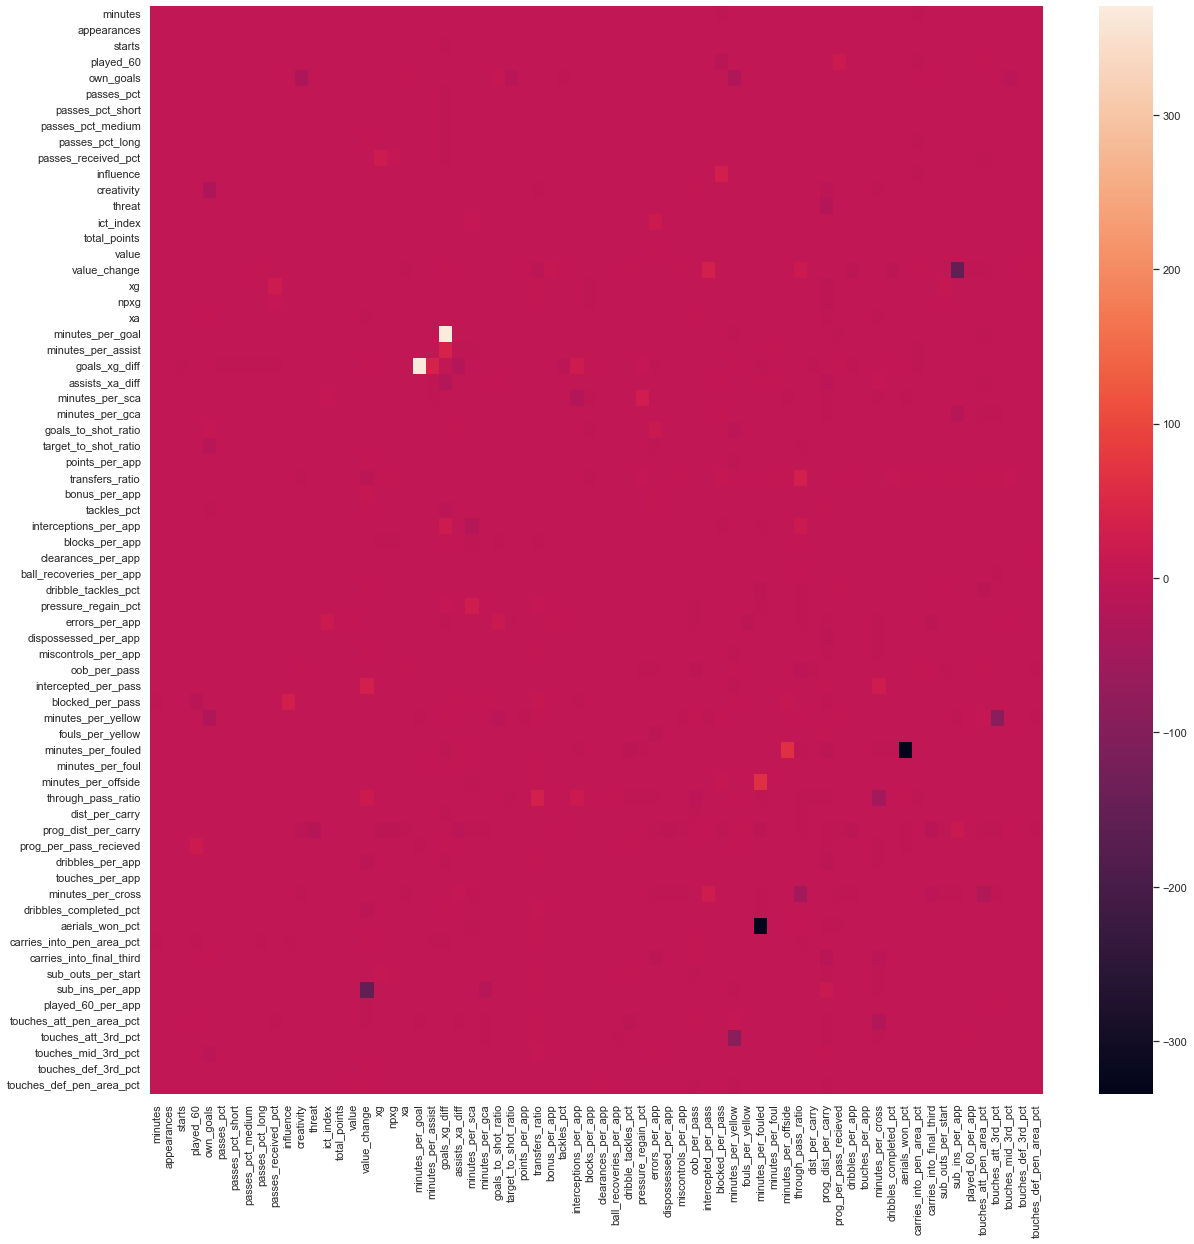

In [29]:
covr_17_compare = (covr['17/18'] - covr['18/19']) / covr['17/18']
sns.heatmap(covr_17_compare)

In [3]:
data = PlayerData(17)
a = data.data_lister(gameweek_range=1)

In [5]:
a['Arsenal']['player_stats']

,player,position,age,minutes,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,...,threat,ict_index,total_points,transfers_balance,transfers_in,transfers_out,bonus,bps,value,value_change
0,Aaron Ramsey,{'DM': 1},26-228,24,0,0,0,0,2,0,...,26,6.7,6,0,0,0,0,16,70,0
1,Ainsley Maitland-Niles,{},0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,Alex Iwobi,{},0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,Alex Oxlade-Chamberlain,"{'WB': 1, 'RB': 1}",23-361,90,0,0,0,1,2,0,...,44,10.9,2,0,0,0,0,26,60,0
4,Alexandre Lacazette,"{'FW': 1, 'LW': 1}",26-075,90,0,0,0,3,2,2,...,60,14.9,6,0,0,0,0,32,105,0
5,Alexis Sánchez,{},0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
6,Calum Chambers,{},0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
7,Danny Welbeck,"{'AM': 1, 'RW': 1}",26-258,74,0,0,0,1,1,1,...,57,12.9,6,0,0,0,0,31,75,0
8,David Ospina,{},0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
9,Eddie Nketiah,{},0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
